Loading world basemap...
Basemap CRS: EPSG:4326
Creating plot...
Displaying plot...


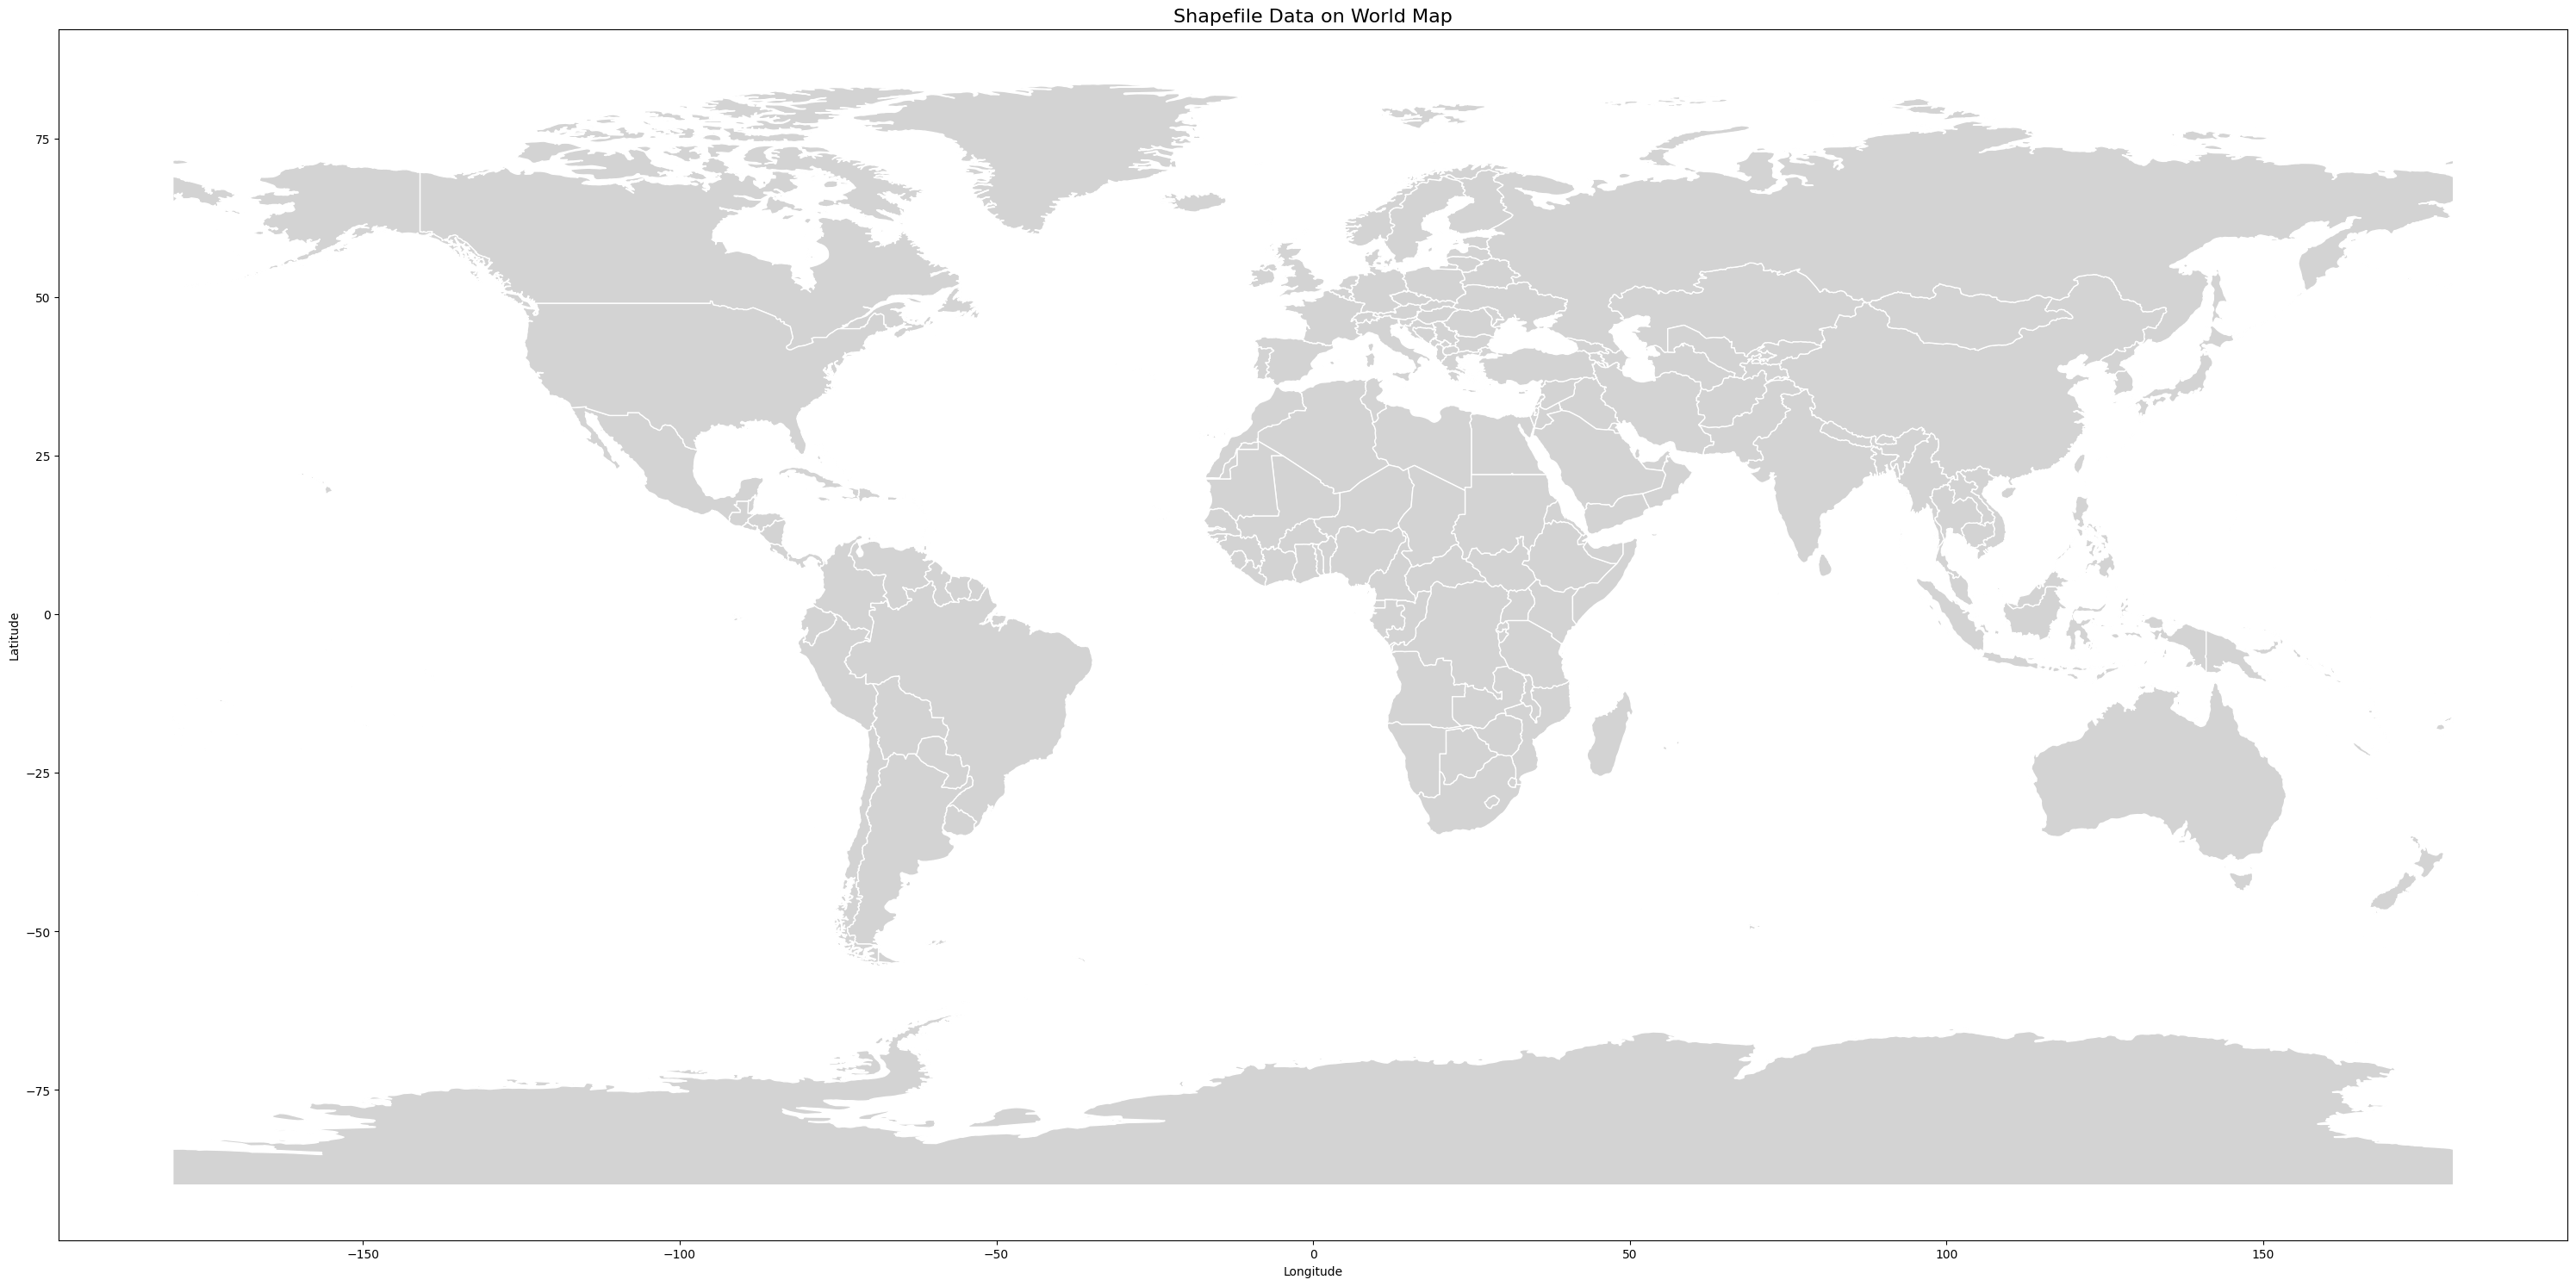

Plot closed.


In [2]:
# VISUALIZE STUFF
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Configuration ---
# REQUIRED: Set the path to your shapefile (.shp)
# Make sure all associated files (.dbf, .shx, .prj, etc.) are in the same directory.
# shapefile_path = 'path/to/your/data.shp' # <--- CHANGE THIS PATH

# Optional: Customize plot appearance
map_figsize = (30, 20)           # Figure size (width, height) in inches
basemap_color = 'lightgrey'      # Color for world continents
basemap_edgecolor = 'white'      # Color for continent borders
data_color = 'blue'              # Color for your shapefile features
data_edgecolor = 'black'         # Color for the border of your shapefile features
data_alpha = 0.7                 # Transparency of your shapefile features (0=transparent, 1=opaque)
plot_title = 'Shapefile Data on World Map'

# Optional: Color features based on a column in the shapefile
# Set 'column_to_plot' to the name of the column you want to use for coloring.
# Set 'cmap_scheme' to a matplotlib colormap name (e.g., 'viridis', 'plasma', 'coolwarm', 'RdYlGn').
# Set 'add_legend' to True if you want a color legend.
column_to_plot = None            # e.g., 'POPULATION' or 'CATEGORY' - Set to None to use single color
cmap_scheme = 'viridis'          # Colormap scheme if plotting by column
add_legend = True                # Add a legend if plotting by column

# --- Script Logic ---

try:
    # 1. Load the world basemap provided by geopandas
    # This uses the 'naturalearth_lowres' dataset which includes country boundaries.
    # You can also use 'naturalearth_hires' for more detail (requires separate download/install)
    # or load your own basemap shapefile.
    print("Loading world basemap...")
    world = gpd.read_file(
        "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
    )
    # We'll assume the standard WGS84 projection for the basemap (EPSG:4326)
    print(f"Basemap CRS: {world.crs}")

    # 4. Create the plot
    print("Creating plot...")
    fig, ax = plt.subplots(1, 1, figsize=map_figsize)
    ax.set_aspect('equal') # Ensure correct aspect ratio for map

    # 5. Plot the basemap (world)
    world.plot(ax=ax, color=basemap_color, edgecolor=basemap_edgecolor)


    # 7. Customize the plot appearance
    ax.set_title(plot_title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # Optional: Turn off axis ticks and labels for a cleaner map look
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # Ensure layout is tight
    plt.tight_layout()

    # 8. Show the plot
    print("Displaying plot...")
    plt.show()
    print("Plot closed.")

except FileNotFoundError:
    # print(f"Error: Shapefile not found at '{shapefile_path}'.")
    print("Please ensure the path is correct and the .shp file exists.")
except ImportError as e:
     print(f"Error: Missing required library. {e}")
     print("Please install geopandas and matplotlib (e.g., 'conda install geopandas matplotlib' or 'pip install geopandas matplotlib').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Consider adding more specific error handling for geopandas/plotting issues if needed

Loading world basemap...
Basemap CRS: EPSG:4326


Skipping field alternatenames: unsupported OGR type: 5


Shapefile loaded successfully. Found 239360 features.
Shapefile CRS: EPSG:4326
Creating plot...
Plotting data with single color: blue
Displaying plot...


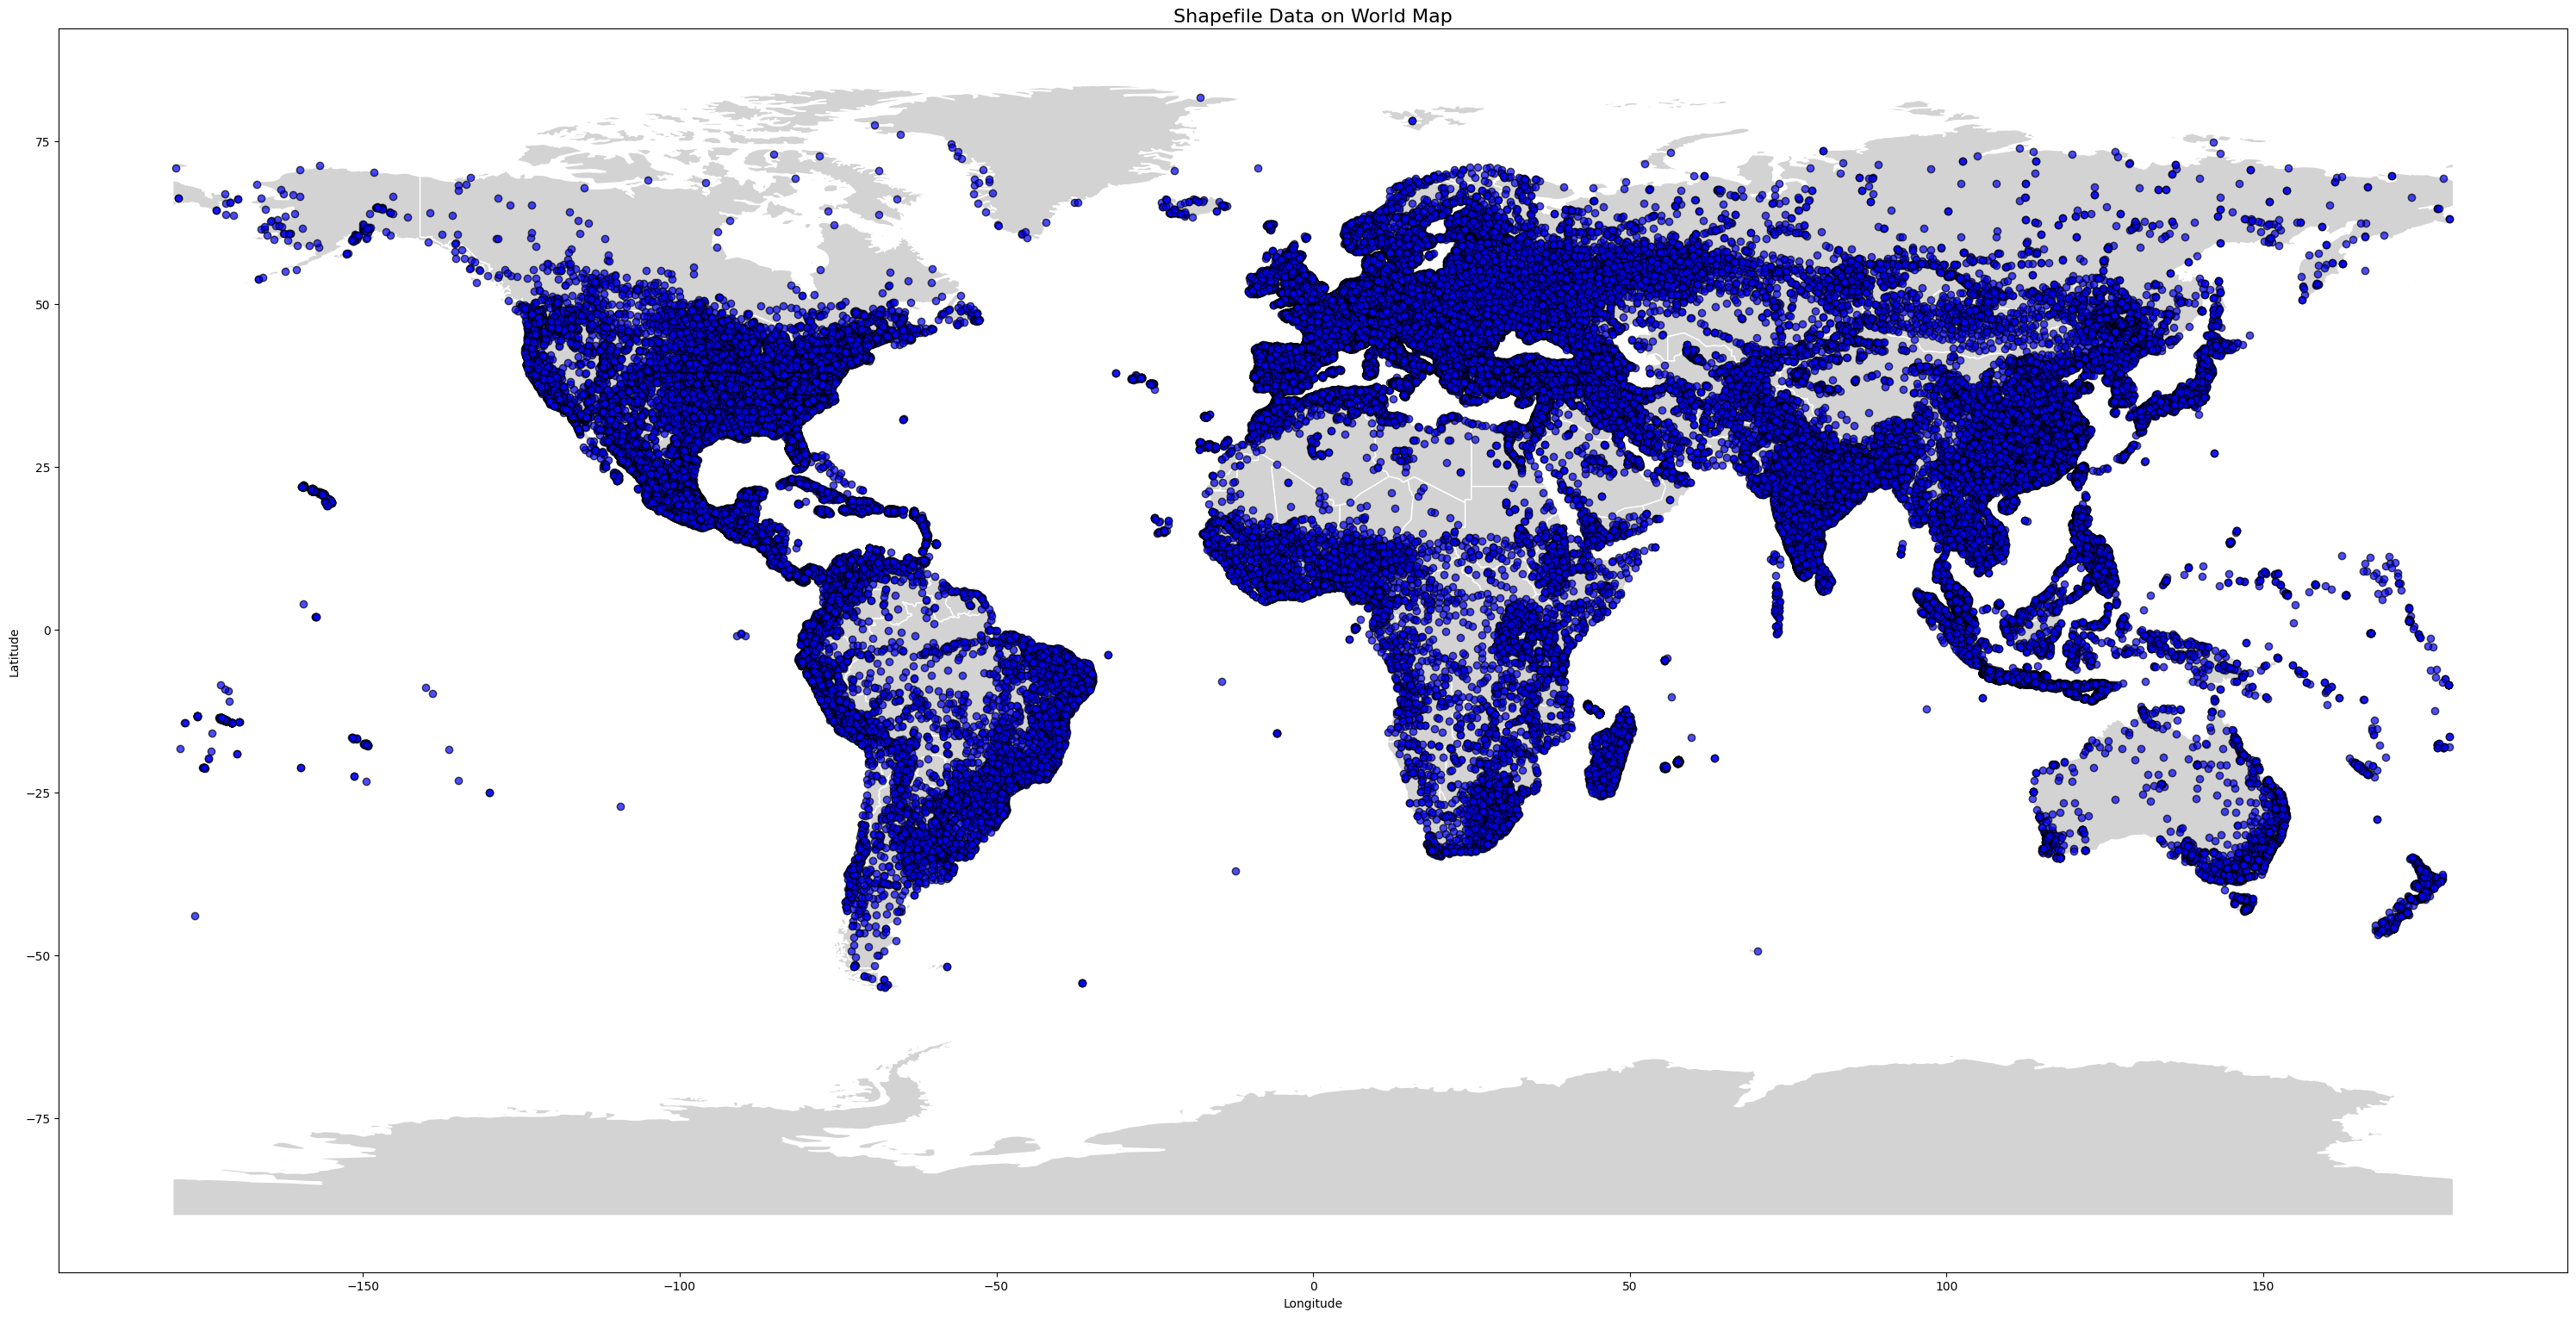

Plot closed.


In [4]:
# VISUALIZE STUFF
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Configuration ---
# REQUIRED: Set the path to your shapefile (.shp)
# Make sure all associated files (.dbf, .shx, .prj, etc.) are in the same directory.
# shapefile_path = 'path/to/your/data.shp' # <--- CHANGE THIS PATH

# Optional: Customize plot appearance
map_figsize = (30, 20)           # Figure size (width, height) in inches
basemap_color = 'lightgrey'      # Color for world continents
basemap_edgecolor = 'white'      # Color for continent borders
data_color = 'blue'              # Color for your shapefile features
data_edgecolor = 'black'         # Color for the border of your shapefile features
data_alpha = 0.7                 # Transparency of your shapefile features (0=transparent, 1=opaque)
plot_title = 'Shapefile Data on World Map'

# Optional: Color features based on a column in the shapefile
# Set 'column_to_plot' to the name of the column you want to use for coloring.
# Set 'cmap_scheme' to a matplotlib colormap name (e.g., 'viridis', 'plasma', 'coolwarm', 'RdYlGn').
# Set 'add_legend' to True if you want a color legend.
column_to_plot = None            # e.g., 'POPULATION' or 'CATEGORY' - Set to None to use single color
cmap_scheme = 'viridis'          # Colormap scheme if plotting by column
add_legend = True                # Add a legend if plotting by column

# --- Script Logic ---

try:
    # 1. Load the world basemap provided by geopandas
    # This uses the 'naturalearth_lowres' dataset which includes country boundaries.
    # You can also use 'naturalearth_hires' for more detail (requires separate download/install)
    # or load your own basemap shapefile.
    print("Loading world basemap...")
    world = gpd.read_file(
        "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
    )
    # We'll assume the standard WGS84 projection for the basemap (EPSG:4326)
    print(f"Basemap CRS: {world.crs}")

    # 2. Load your shapefile data
    # print(f"Loading shapefile data from: {shapefile_path}...")
    gdf_data = gpd.read_file("reverse_geocode3/outputs/combined_cities.geojson")
    print(f"Shapefile loaded successfully. Found {len(gdf_data)} features.")
    print(f"Shapefile CRS: {gdf_data.crs}")

    # 3. Coordinate Reference System (CRS) Handling
    # It's CRUCIAL that both layers use the same CRS for correct plotting.
    # We'll reproject the shapefile data to match the basemap's CRS if they differ.
    if gdf_data.crs != world.crs:
        print(f"Shapefile CRS ({gdf_data.crs}) differs from basemap CRS ({world.crs}). Reprojecting data...")
        gdf_data = gdf_data.to_crs(world.crs)
        print(f"Shapefile data reprojected to CRS: {gdf_data.crs}")

    # 4. Create the plot
    print("Creating plot...")
    fig, ax = plt.subplots(1, 1, figsize=map_figsize)
    ax.set_aspect('equal') # Ensure correct aspect ratio for map

    # 5. Plot the basemap (world)
    world.plot(ax=ax, color=basemap_color, edgecolor=basemap_edgecolor)

    # 6. Plot your shapefile data on top
    plot_kwargs = {
        'ax': ax,
        'edgecolor': data_edgecolor,
        'alpha': data_alpha
    }

    if column_to_plot and column_to_plot in gdf_data.columns:
        print(f"Plotting data colored by column '{column_to_plot}' using colormap '{cmap_scheme}'...")
        plot_kwargs['column'] = column_to_plot
        plot_kwargs['cmap'] = cmap_scheme
        if add_legend:
             # Add legend options for continuous data
            plot_kwargs['legend'] = True
            plot_kwargs['legend_kwds'] = {'label': f"{column_to_plot}",
                                         'orientation': "horizontal",
                                         'shrink': 0.5} # Adjust shrink as needed
        gdf_data.plot(**plot_kwargs)

    else:
        if column_to_plot:
             print(f"Warning: Column '{column_to_plot}' not found in shapefile. Plotting with single color.")
        print(f"Plotting data with single color: {data_color}")
        plot_kwargs['color'] = data_color
        gdf_data.plot(**plot_kwargs)


    # 7. Customize the plot appearance
    ax.set_title(plot_title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # Optional: Turn off axis ticks and labels for a cleaner map look
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # Ensure layout is tight
    plt.tight_layout()

    # 8. Show the plot
    print("Displaying plot...")
    plt.show()
    print("Plot closed.")

except FileNotFoundError:
    # print(f"Error: Shapefile not found at '{shapefile_path}'.")
    print("Please ensure the path is correct and the .shp file exists.")
except ImportError as e:
     print(f"Error: Missing required library. {e}")
     print("Please install geopandas and matplotlib (e.g., 'conda install geopandas matplotlib' or 'pip install geopandas matplotlib').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Consider adding more specific error handling for geopandas/plotting issues if needed